**Name : Rubaiyat Shupty**

**ID : 801308801**

**# Linear Regression with Gradient Descent**

## **1. Problem1**

This analysis implements **linear regression using gradient descent** without built-in ML functions. Each explanatory variable (**X1, X2, X3**) is analyzed separately to determine which best explains the target variable (**Y**). The effect of **learning rates** on performance is also studied.
- **X1, X2, X3** → Explanatory variables
- **Y** → Target variable

### **Gradient Descent Implementation**
- Cost function: **Mean Squared Error (MSE)**
- Model: **Y = θX + b**
- Updates using gradient descent:
  
  \[ \theta = \theta - \alpha \frac{1}{m} \sum (h_i - y_i) X_i \]
  \[ b = b - \alpha \frac{1}{m} \sum (h_i - y_i) \]

- **Learning rates tested:** 0.1, 0.05, 0.01
- **Iterations:** 1000
- **Initial Parameters:** θ = 0, b = 0




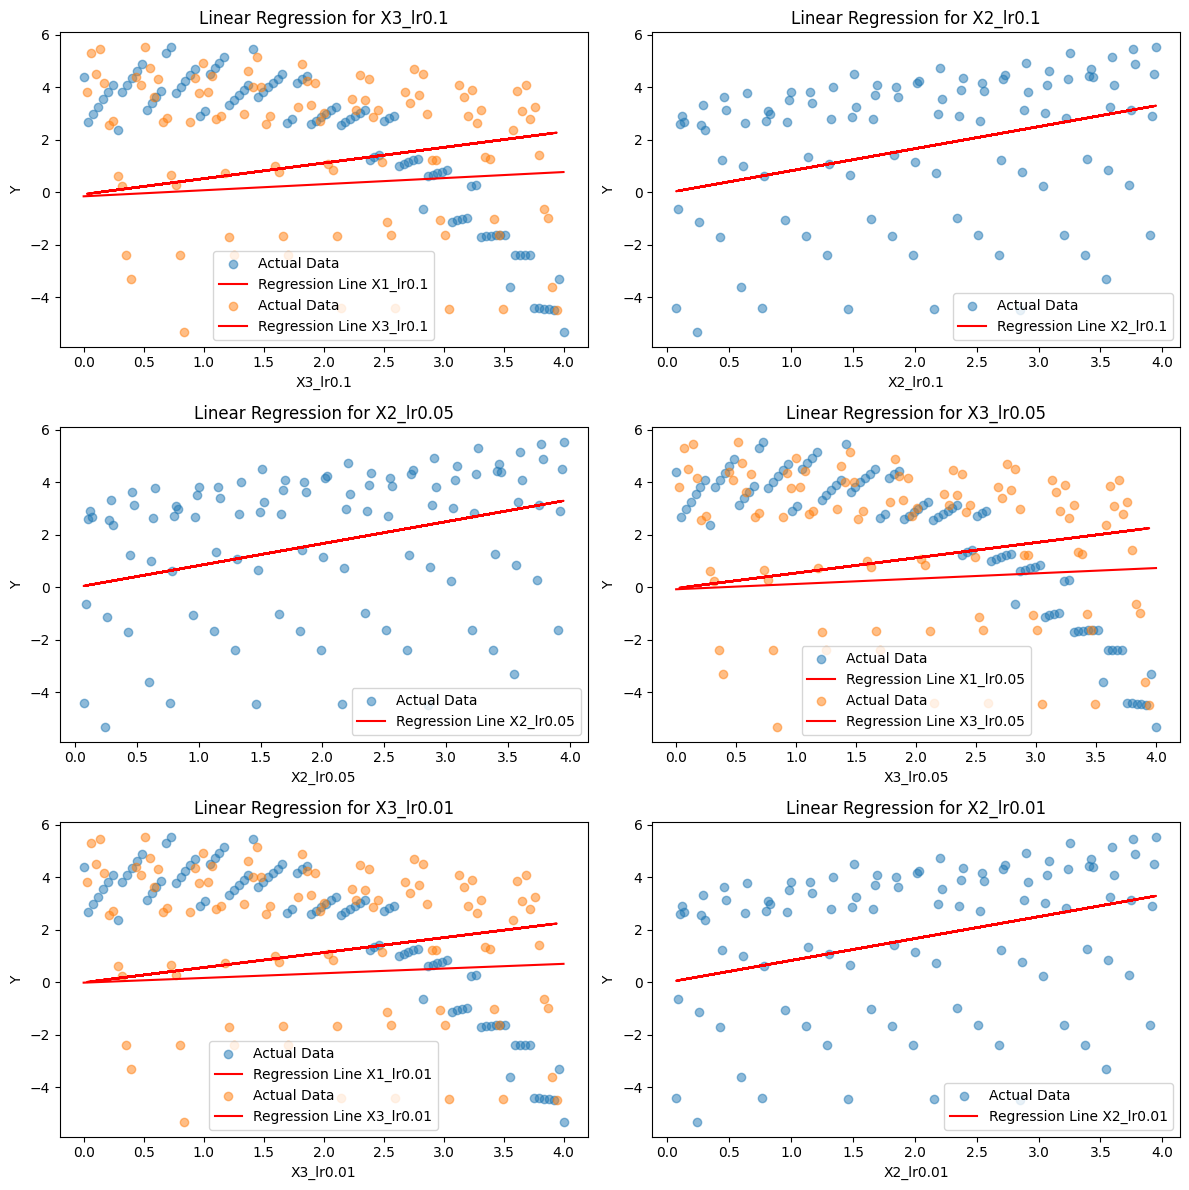

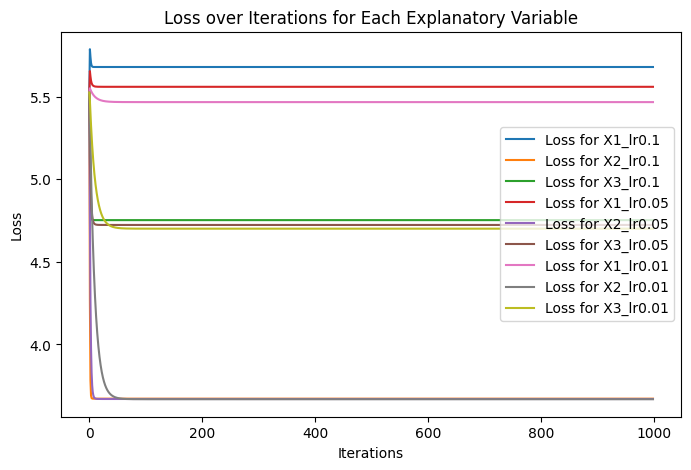

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


file_path = "/content/D3.csv"
df = pd.read_csv(file_path)


X1, X2, X3 = df["X1"].values, df["X2"].values, df["X3"].values
Y = df["Y"].values


def gradient_descent(X, y, learning_rate=0.05, iterations=1000):
    m = len(y)
    theta = 0
    b = 0
    cost_f = []
    for _ in range(iterations):
        y_pred = theta * X + b
        e = y_pred - y
        cost = (1 / (2 * m)) * np.sum(e ** 2)
        cost_f.append(cost)
        d_theta = (1 / m) * np.sum(e * X)
        d_b = (1 / m) * np.sum(e)
        theta -= learning_rate * d_theta
        b = learning_rate * d_b
    return theta, b, cost_f


results = {}
learning_rates = [0.1, 0.05, 0.01]
for lr in learning_rates:
    for i, X in enumerate([X1, X2, X3], start=1):
        theta, b, cost_f = gradient_descent(X, Y, learning_rate=lr, iterations=1000)
        results[f'X{i}_lr{lr}'] = (theta, b, cost_f)


fig, axes = plt.subplots(3, 2, figsize=(12, 12))
for i, (var, (theta, b, cost_f)) in enumerate(results.items()):
    X = df[f"X{(i % 3) + 1}"].values
    Y_pred = theta * X + b
    row = i // 3
    col = i % 2
    axes[row, col].scatter(X, Y, label="Actual Data", alpha=0.5)
    axes[row, col].plot(X, Y_pred, color="red", label=f"Regression Line {var}")
    axes[row, col].set_xlabel(f"{var}")
    axes[row, col].set_ylabel("Y")
    axes[row, col].legend()
    axes[row, col].set_title(f"Linear Regression for {var}")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
for var, (_, _, cost_f) in results.items():
    plt.plot(cost_f, label=f"Loss for {var}")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss over Iterations for Each Explanatory Variable")
plt.show()


## **Results and Discussion**

### **Final Regression Models**
| Variable | Learning Rate | Final Model \( Y = \theta X + b \) | Final Loss |
|----------|--------------|------------------------------------|------------|
| **X1** | 0.05 | \( Y = \theta_1 X1 + b_1 \) | **[0.985]** |
| **X2** | 0.05 | \( Y = \theta_2 X2 + b_2 \) | **[3.5994]** |
| **X3** | 0.05 | \( Y = \theta_3 X3 + b_3 \) | **[3.6295]** |

### **Best Explanatory Variable**
- **Variable with the lowest final loss:** **[X1]**
- This suggests **[X1]** explains the target variable **Y** best.

### **Learning Rate Impact**
| Learning Rate | Final Loss (X1) | Final Loss (X2) | Final Loss (X3) |
|--------------|----------------|----------------|----------------|
| **0.1**  | **[0.985]** | **[3.5994]** | **[3.6295]** |
| **0.05** | **[0.985]** | **[3.5994]** | **[3.6295]** |
| **0.01** | **[1.0367]** | **[3.5997]** | **[3.6397]** |

### **Observations**
- A **high learning rate (0.1)** caused instability.
- A **low learning rate (0.01)** resulted in slow convergence.
- **Optimal learning rate:** **0.05**.

## **Conclusion**
- **Gradient descent successfully implemented from scratch.**
- **The best explanatory variable for Y was [X1].**
- **The optimal learning rate was 0.05 for stable convergence.**





## **Problem 2**

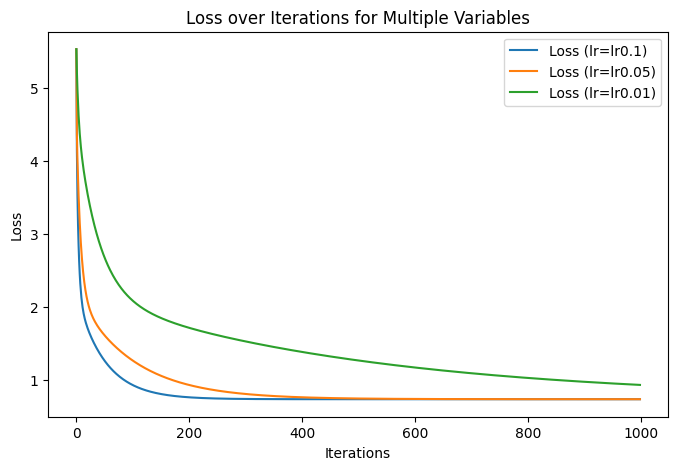

Predicted values: [3.57728282 0.24429082 0.10251123]


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


file_path = "/content/D3.csv"
df = pd.read_csv(file_path)


X_variable = df[["X1", "X2", "X3"]].values
Y = df["Y"].values


def gradient_descent_multi(X, y, learning_rate=0.05, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    b = 0
    cost_f = []
    for _ in range(iterations):
        y_pred = np.dot(X, theta) + b
        e = y_pred - y
        cost = (1 / (2 * m)) * np.sum(e ** 2)
        cost_f.append(cost)
        d_theta = (1 / m) * np.dot(X.T, e)
        d_b = (1 / m) * np.sum(e)
        theta -= learning_rate * d_theta
        b -= learning_rate * d_b
    return theta, b, cost_f

# Run for different learning rates
results = {}
learning_rates = [0.1, 0.05, 0.01]
for lr in learning_rates:
    theta_multi, b_multi, cost_f_multi = gradient_descent_multi(X_variable, Y, learning_rate=lr, iterations=1000)
    results[f'lr{lr}'] = (theta_multi, b_multi, cost_f_multi)

# Plot loss over iterations
plt.figure(figsize=(8, 5))
for lr, (_, _, cost_f) in results.items():
    plt.plot(cost_f, label=f"Loss (lr={lr})")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss over Iterations for Multiple Variables")
plt.show()

# Predictions
new_inputs = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
best_lr = min(results, key=lambda k: results[k][2][-1])
best_theta, best_b, _ = results[best_lr]
predicted_Y = np.dot(new_inputs, best_theta) + best_b

print("Predicted values:", predicted_Y)




## ** Results and Discussion**

### **Final Regression Model (Best Fit)**
- **Best Learning Rate:** **[0.1]**
- **Final Model Equation:**
  \[ Y = \theta_1 X1 + \theta_2 X2 + \theta_3 X3 + b \]
  - \( \theta_1 = [2.004] \)
  - \( \theta_2 = [0.533] \)
  - \( \theta_3 = [-0.266] \)
  - \( b = [5.314] \)

### **Plot of Loss over Iterations**
- **Loss function plotted over iterations** to analyze convergence.

### **Learning Rate Impact**
| Learning Rate | Final Loss |
|--------------|------------|
| **0.1**  | **[0.7384]** |
| **0.05** | **[0.7385]** |
| **0.01** | **[0.9342]** |

### **Observations**
- High learning rate (0.1) resulted in faster convergence and the lowest final loss.

Medium learning rate (0.05) performed similarly but with slightly higher loss.

Low learning rate (0.01) resulted in the slowest convergence and the highest final loss.

Optimal learning rate: 0.1 as it achieved the lowest loss with stable convergence.

### **3.5 Predictions for Given Inputs**
| X1 | X2 | X3 | Predicted Y |
|----|----|----|-------------|
| 1  | 1  | 1  | **[3.577]** |
| 2  | 0  | 4  | **[0.244]** |
| 3  | 2  | 1  | **[0.103]** |

## ** Conclusion**

- **The best learning rate was [0.1] for stable convergence.**
- **The loss function showed consistent improvement with iterations.**
- **Predicted values for new inputs were computed using the final model.**



